# Recurrent Neural Network (RNN) Classification Workflow

# Introduction

In this tutorial, we will walk through the process of building a text classification model using Recurrent Neural Networks (RNNs) with the IMDB dataset. The IMDB dataset consists of movie reviews labeled as positive or negative, making it an excellent dataset for binary classification tasks.

## Recurrent Neural Networks (RNNs)

Recurrent Neural Networks (RNNs) are a class of neural networks designed to recognize patterns in sequences of data, such as text, time series, or speech. Unlike traditional neural networks, RNNs have connections that form directed cycles, allowing information to persist. This makes them particularly effective for tasks where the order of data points is important.

RNNs maintain a hidden state that captures information from previous time steps, enabling them to retain context. This is particularly useful in natural language processing tasks, where the meaning of a word can depend on the preceding words.

## Considerations for Text Classification

When using RNNs for text classification, several considerations are essential:

1. **Data Preprocessing**: Text data must be preprocessed to convert it into a format suitable for RNNs. This includes tokenization, padding, and encoding the text into numerical representations.
2. **Sequence Length**: The length of input sequences should be consistent. This is typically achieved through padding or truncation.
3. **Vocabulary Size**: The size of the vocabulary (number of unique words) can impact the model's performance. A larger vocabulary captures more information but requires more computational resources.
4. **Model Complexity**: The architecture of the RNN (number of layers, number of units per layer) should be chosen based on the complexity of the task and the available computational resources.

## Pros and Cons of RNNs

**Pros:**
- **Contextual Understanding**: RNNs can maintain context across sequences, making them effective for tasks where the order of data is important.
- **Versatility**: They can be used for various sequential data tasks, including language modeling, machine translation, and time series prediction.

**Cons:**
- **Vanishing Gradient Problem**: RNNs can suffer from the vanishing gradient problem, where gradients diminish as they are backpropagated through many layers, making training difficult.
- **Computationally Intensive**: Training RNNs can be time-consuming and require significant computational resources, especially for long sequences.

## Required Libraries

To implement a text classification model with RNNs, we will use the following libraries:

- **NumPy**: For numerical operations.
- **TensorFlow/Keras**: For building and training the neural network model.
- **IMDB Dataset**: Available in Keras, this dataset provides pre-processed movie reviews for training and testing.

Here are the specific imports needed:

```python
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.layers import LSTM  # Optionally, you can use LSTM instead of SimpleRNN


## IMDB Dataset

The IMDB dataset is a collection of 50,000 highly polar movie reviews labeled as either positive or negative. It is commonly used for binary sentiment classification tasks. This dataset is split evenly into 25,000 training and 25,000 testing samples, with an equal number of positive and negative reviews in each set.

The reviews have been preprocessed, and each review is encoded as a sequence of word indexes (integers). For this tutorial, we will limit our vocabulary to the 10,000 most frequent words.

The IMDB dataset is a benchmark dataset in the field of natural language processing and machine learning, providing a practical platform to evaluate algorithms for text classification.


## Step 1: Import Necessary Libraries

In [6]:
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.layers import LSTM  # Optionally, you can use LSTM instead of SimpleRNN

## Step 2: Load and Prepare the Data
- We'll load this dataset, and then pad the sequences to ensure they are of the same length.

In [7]:
# Set parameters
max_features = 10000  # Number of words to consider as features
maxlen = 500  # Cut texts after this number of words (among top max_features most common words)
batch_size = 32

# Load the data
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# Pad sequences (samples x time)
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

print(f'x_train shape: {x_train.shape}')
print(f'x_test shape: {x_test.shape}')


x_train shape: (25000, 500)
x_test shape: (25000, 500)


## Step 3: Build the RNN Model
- Here, we'll create a Sequential model with an Embedding layer, a SimpleRNN (or LSTM) layer, and a Dense layer for classification.

In [8]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))  # You can replace SimpleRNN with LSTM if you prefer
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          320000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________
None


## Step 4: Train the Model

In [9]:
history = model.fit(x_train, y_train, epochs=10, batch_size=batch_size, validation_split=0.2)


Epoch 1/10


2024-07-30 00:24:41.769650: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


625/625 [==============================] - 19s 30ms/step - loss: 0.5953 - accuracy: 0.6633 - val_loss: 0.4697 - val_accuracy: 0.7880
Epoch 2/10
625/625 [==============================] - 19s 30ms/step - loss: 0.3611 - accuracy: 0.8463 - val_loss: 0.4236 - val_accuracy: 0.8236
Epoch 3/10
625/625 [==============================] - 19s 30ms/step - loss: 0.1925 - accuracy: 0.9281 - val_loss: 0.4618 - val_accuracy: 0.8218
Epoch 4/10
625/625 [==============================] - 19s 30ms/step - loss: 0.0781 - accuracy: 0.9748 - val_loss: 0.8066 - val_accuracy: 0.7016
Epoch 5/10
625/625 [==============================] - 19s 30ms/step - loss: 0.0453 - accuracy: 0.9863 - val_loss: 0.7045 - val_accuracy: 0.7938
Epoch 6/10
625/625 [==============================] - 19s 30ms/step - loss: 0.0291 - accuracy: 0.9912 - val_loss: 0.7358 - val_accuracy: 0.8032
Epoch 7/10
625/625 [==============================] - 19s 30ms/step - loss: 0.0176 - accuracy: 0.9954 - val_loss: 0.8163 - val_accuracy: 0.7722
Epo

## Step 5: Evaluate the Model
- Finally, we'll evaluate the model's performance on the test data

In [10]:
test_loss, test_acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_acc}')


782/782 [==============================] - 5s 6ms/step - loss: 0.8628 - accuracy: 0.7894
Test Loss: 0.8628067374229431
Test Accuracy: 0.789359986782074


### 1. Confusion Matrix
A confusion matrix provides a detailed breakdown of the model's performance by showing the counts of true positive, true negative, false positive, and false negative predictions.

782/782 [==============================] - 4s 6ms/step


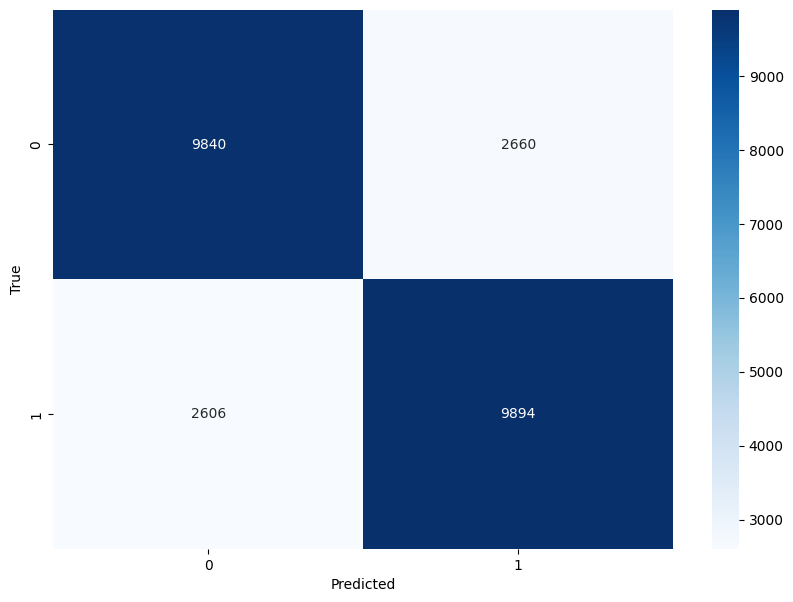

In [11]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = (model.predict(x_test) > 0.5).astype("int32")
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


### 2. Precision, Recall, and F1 Score
Precision, recall, and F1 score provide a more nuanced evaluation of the model's performance, especially useful in cases of imbalanced classes

In [12]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')


Precision: 0.7881153417237534
Recall: 0.79152
F1 Score: 0.7898140017562066


### 3. ROC Curve and AUC
The Receiver Operating Characteristic (ROC) curve plots the true positive rate against the false positive rate at various threshold settings, and the Area Under the Curve (AUC) quantifies the overall ability of the model to discriminate between positive and negative classes.

782/782 [==============================] - 4s 6ms/step


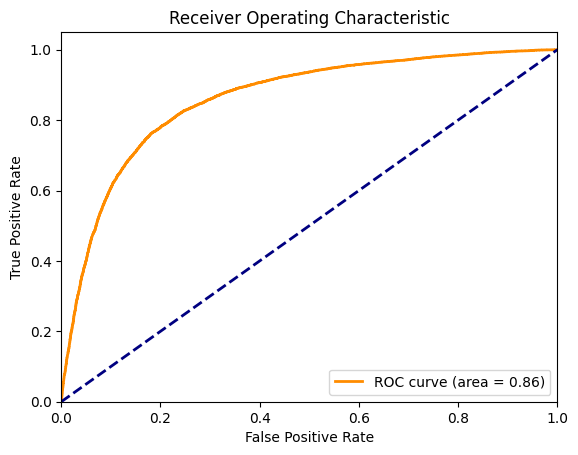

In [13]:
from sklearn.metrics import roc_curve, auc

y_pred_proba = model.predict(x_test).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


### 4. Log Loss
Logarithmic Loss (Log Loss) or Binary Crossentropy measures the performance of a classification model whose output is a probability value between 0 and 1.

In [16]:
from sklearn.metrics import log_loss

log_loss_value = log_loss(y_test, y_pred_proba)
print(f'Log Loss: {log_loss_value}')


Log Loss: 0.8628105470786224


### 5. Classification Report
A classification report provides a comprehensive summary of the model's precision, recall, F1 score, and support for each class.

In [17]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.79      0.79      0.79     12500
           1       0.79      0.79      0.79     12500

    accuracy                           0.79     25000
   macro avg       0.79      0.79      0.79     25000
weighted avg       0.79      0.79      0.79     25000



## Explanation
1. Import Libraries: We import necessary modules from Keras and TensorFlow.
2. Load Data: We load the IMDB dataset, which is pre-split into training and testing sets.
3. Preprocess Data: We pad the sequences so that all inputs have the same length.
4. Build Model: We construct an RNN model with an embedding layer, a recurrent layer (SimpleRNN or LSTM), and a dense output layer with a sigmoid activation function.
5. Compile Model: We compile the model using the Adam optimizer and binary crossentropy loss function.
6. Train Model: We train the model on the training data with a validation split to monitor performance on unseen data.
7. Evaluate Model: We evaluate the model on the test set and print the loss and accuracy.

This workflow provides a solid foundation for text classification using RNNs with the IMDB dataset. You can experiment with different hyperparameters, architectures, and layers to further optimize the model.

#### Author:
 Meghan Beverly